In [1]:
from jacobi.complex_step import jacobi as cjac
from jacobi.real_step import jacobi as rjac, forward, central
import numpy as np
from matplotlib import pyplot as plt

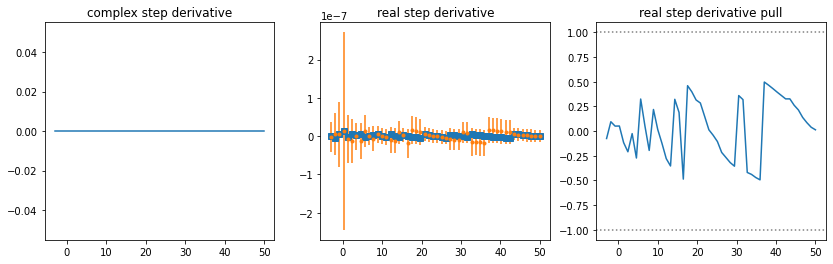

In [2]:
x = np.linspace(-3, 50)
f = np.exp
y = f(x)
dy0 = y
dy1 = cjac(f, x)
dy2 = rjac(f, x)
dy3, dy3e = rjac(f, x, True)
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True)
ax[0].set_title("complex step derivative")
ax[0].plot(x, dy1/ dy0 - 1, zorder=1)
ax[1].set_title("real step derivative")
ax[1].plot(x, dy2/ dy0 - 1, "s", zorder=2)
ax[1].errorbar(x, dy3/ dy0 - 1, dy3e / dy0, fmt=".", zorder=2)
ax[2].set_title("real step derivative pull")
ax[2].plot(x, (dy3 - dy0) / dy3e, 1)
for y in (-1,1):
    ax[2].axhline(y, ls=":", color="0.5")

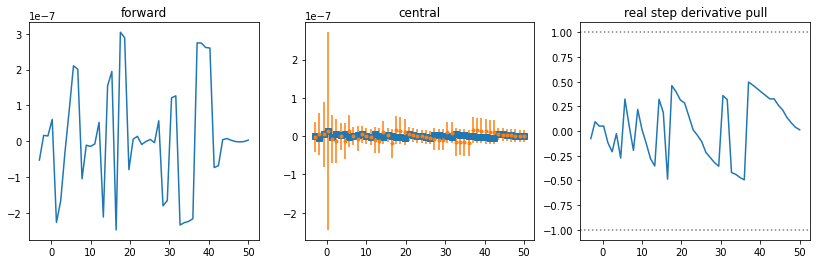

In [3]:
x = np.linspace(-3, 50)
f = np.exp
y = f(x)
dy0 = y
dy1,_ = forward(f, x, None, True)
dy2 = central(f, x, None, False)
dy3, dy3e = central(f, x, None, True)
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True)
ax[0].set_title("forward")
ax[0].plot(x, dy1/ dy0 - 1, zorder=1)
ax[1].set_title("central")
ax[1].plot(x, dy2/ dy0 - 1, "s", zorder=2)
ax[1].errorbar(x, dy3/ dy0 - 1, dy3e / dy0, fmt=".", zorder=2)
ax[2].set_title("real step derivative pull")
ax[2].plot(x, (dy3 - dy0) / dy3e, 1)
for y in (-1,1):
    ax[2].axhline(y, ls=":", color="0.5")

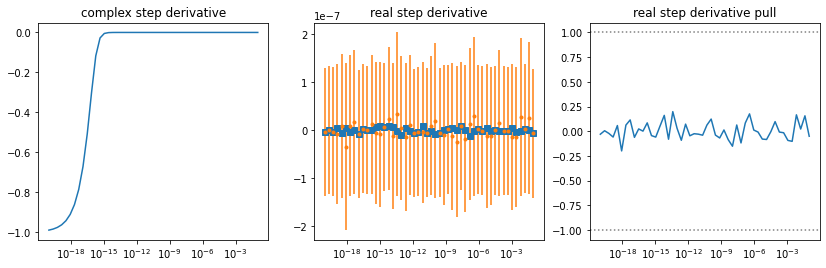

In [4]:
x = np.geomspace(1e-20, 0.1)
f = np.sqrt
y = f(x)
dy0 = 0.5 * x ** -0.5
dy1 = cjac(f, x)
dy2 = rjac(f, x)
dy3, dy3e = rjac(f, x, True)
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True)
ax[0].set_title("complex step derivative")
ax[0].plot(x, dy1/ dy0 - 1, zorder=1)
ax[1].set_title("real step derivative")
ax[1].plot(x, dy2/ dy0 - 1, "s", zorder=2)
ax[1].errorbar(x, dy3/ dy0 - 1, dy3e / dy0, fmt=".", zorder=2)
ax[2].set_title("real step derivative pull")
ax[2].plot(x, (dy3 - dy0) / dy3e, 1)
for y in (-1,1):
    ax[2].axhline(y, ls=":", color="0.5")
plt.semilogx();

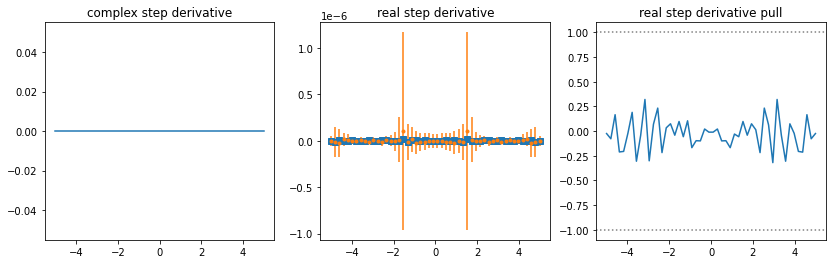

In [5]:
f = np.sin
x = np.linspace(-5, 5)
y = f(x)
dy0 = np.cos(x)
dy1 = cjac(f, x)
dy2 = rjac(f, x)
dy3, dy3e = rjac(f, x, True)
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True)
ax[0].set_title("complex step derivative")
ax[0].plot(x, dy1/ dy0 - 1, zorder=1)
ax[1].set_title("real step derivative")
ax[1].plot(x, dy2/ dy0 - 1, "s", zorder=2)
ax[1].errorbar(x, dy3/ dy0 - 1, dy3e / dy0, fmt=".", zorder=2)
ax[2].set_title("real step derivative pull")
ax[2].plot(x, (dy3 - dy0) / dy3e, 1)
for y in (-1,1):
    ax[2].axhline(y, ls=":", color="0.5");

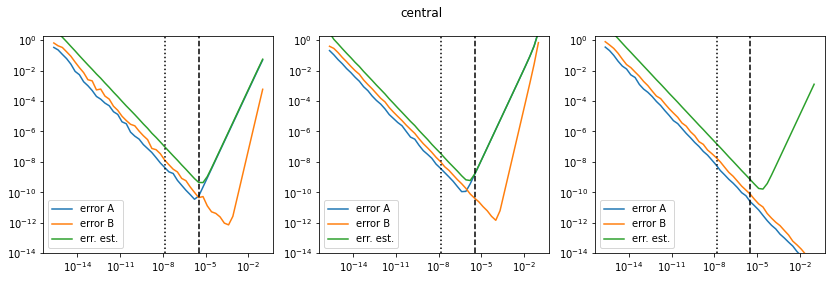

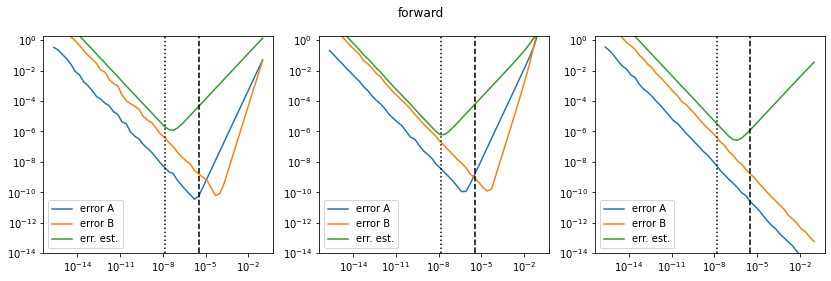

In [6]:
from jacobi.real_step import central, forward
eps = np.finfo(float).eps

h = np.geomspace(eps, 0.1)

for deriv in (central, forward):

    fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True)
    plt.suptitle(deriv.__name__)
    for axi, f, df, x in (
        (ax[0], np.sin, np.cos, np.linspace(-10, 10)),
        (ax[1], np.exp, np.exp, np.linspace(-5, 50)),
        (ax[2], np.sqrt, lambda x: 0.5 * x ** -0.5, np.geomspace(1e-10, 1)),
    ):
        dy0 = df(x)
        s1 = np.vectorize(lambda h: np.nanstd(deriv(f, x, np.abs(h * x)) / dy0))(h)
        s2 = np.vectorize(lambda h: np.nanstd(deriv(f, x, np.abs(h * x), True)[0] / dy0))(h)
        se = np.vectorize(lambda h: np.nanmean(deriv(f, x, np.abs(h * x), True)[1] / np.abs(dy0)))(h)

        plt.sca(axi)
        plt.plot(h, s1, label="error A")
        plt.plot(h, s2, label="error B")
        plt.plot(h, se, label="err. est.")
        plt.legend()

        plt.axvline(eps ** 0.5, ls=":", color="k")
        plt.axvline(eps ** 0.35, ls="--", color="k")
        plt.ylim(1e-14, 2)
        plt.loglog();